____

![image info](https://media-exp1.licdn.com/dms/image/C4D0BAQHwbJsi7wAEzw/company-logo_200_200/0/1649942397847?e=1660780800&amp;v=beta&amp;t=HziWmz2CyzdNhqetoLywIm5Ah9ywjDkkpuA1Q8xXMrU)
____

**Data Scientist - Marketing - Data Challenge**

**By Randy Bukasa**

In the following notebook I will explore the 

In [361]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [362]:
#load dataset
df = pd.read_csv(r'cltv_estimations.csv')
df.head()

,CUSTOMER_ID,FIRST_RENTAL_ZONE_ID,FIRST_RENTAL_COUNTRY,REGISTERED_AT,BUSINESS_AREA_KM2,CLTV_1_YEAR,RENTAL_BILLING_EUR_RENTAL_X_DAYS,RENTAL_COUNT_WEEKENDEVE_X_DAYS,RENTAL_COUNT_WEEKDAYEVE_X_DAYS,COUNT_RENTALS_FIRST_DAY,DAYS_LEAD_TO_FIRST_RENTAL,CHANNEL,OS
0,87990475,BARCELONA,Spain,2017-03-01T00:00:03.231272458Z,144.270,1722.840,80.870,2,1,1,0,Organic,iOS
1,88038758,no rental,no rental,2017-03-01T00:01:09.868486455Z,NaN,0.000,0.000,0,0,0,15,Organic,Android
2,77331808,DUESSELDORF,Germany,2017-03-01T00:04:32.296821536Z,38.910,45.080,35.050,0,0,1,0,Organic,Android
3,46595033,FRANKFURT,Germany,2017-03-01T00:12:27.873587096Z,80.050,125.800,15.110,0,0,2,0,Organic,Android
4,14814727,no rental,no rental,2017-03-01T00:12:38.144587713Z,NaN,0.000,0.000,0,0,0,15,Organic,Android


In [363]:
#check for missing values & data types - helps cleaning data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170416 entries, 0 to 170415
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CUSTOMER_ID                       170416 non-null  int64  
 1   FIRST_RENTAL_ZONE_ID              170416 non-null  object 
 2   FIRST_RENTAL_COUNTRY              170416 non-null  object 
 3   REGISTERED_AT                     170416 non-null  object 
 4   BUSINESS_AREA_KM2                 94013 non-null   float64
 5   CLTV_1_YEAR                       170416 non-null  float64
 6   RENTAL_BILLING_EUR_RENTAL_X_DAYS  170416 non-null  float64
 7   RENTAL_COUNT_WEEKENDEVE_X_DAYS    170416 non-null  int64  
 8   RENTAL_COUNT_WEEKDAYEVE_X_DAYS    170416 non-null  int64  
 9   COUNT_RENTALS_FIRST_DAY           170416 non-null  int64  
 10  DAYS_LEAD_TO_FIRST_RENTAL         170416 non-null  int64  
 11  CHANNEL                           170416 non-null  o

In [364]:
#As seen above registration data not in correct format - editing for ease of use
df['REGISTERED_AT'] = pd.to_datetime(df['REGISTERED_AT'], infer_datetime_format=True)
df['date'] = df['REGISTERED_AT'].dt.to_period('D')

In [365]:
#How many customers had no spend vs those that did 
print('Registered customers without rentals:',df[df['BUSINESS_AREA_KM2'].isna()].shape[0], '\n'
      'Registered customers with rentals:',df[df['BUSINESS_AREA_KM2'] > 0].shape[0])

Registered customers without rentals: 76403 
Registered customers with rentals: 94013


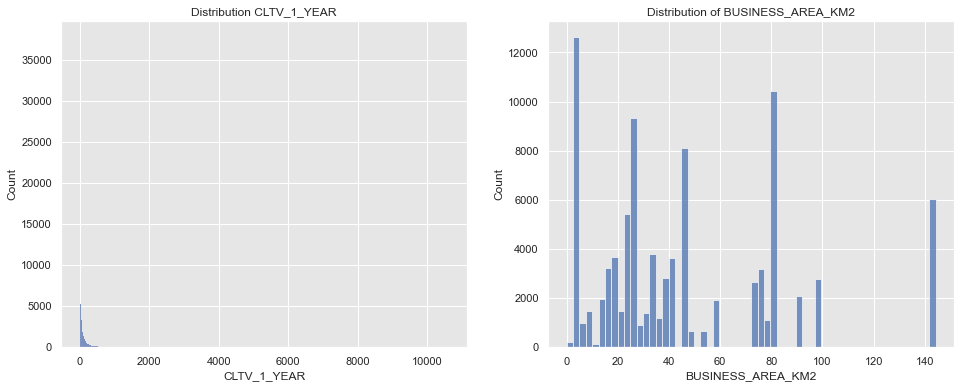

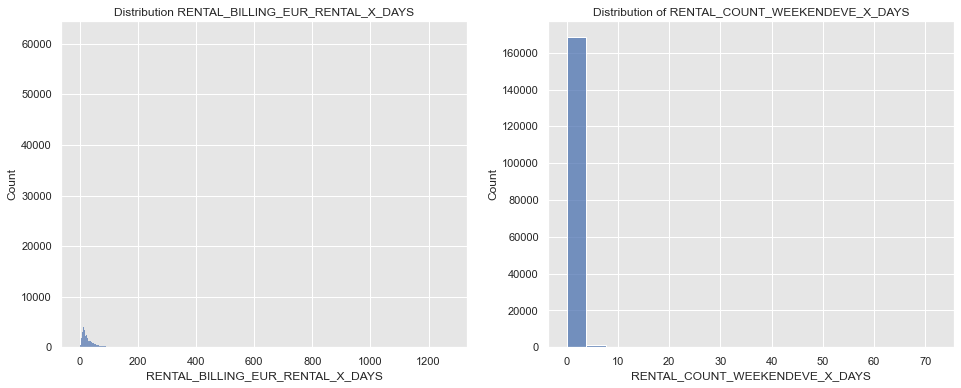

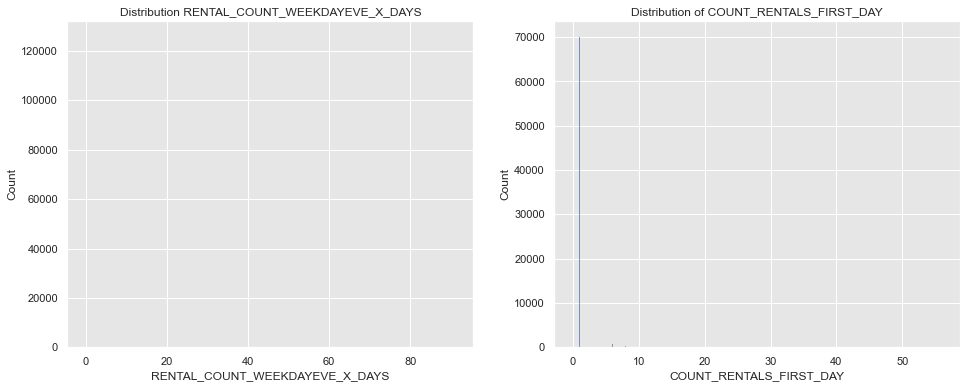

In [366]:
#Lets look at spend values for continous data
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['CLTV_1_YEAR']);
plt.title('Distribution CLTV_1_YEAR');
plt.subplot(1, 2, 2)
sns.histplot(df['BUSINESS_AREA_KM2']);
plt.title('Distribution of BUSINESS_AREA_KM2');

fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['RENTAL_BILLING_EUR_RENTAL_X_DAYS']);
plt.title('Distribution RENTAL_BILLING_EUR_RENTAL_X_DAYS');
plt.subplot(1, 2, 2)
sns.histplot(df['RENTAL_COUNT_WEEKENDEVE_X_DAYS']);
plt.title('Distribution of RENTAL_COUNT_WEEKENDEVE_X_DAYS');

fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['RENTAL_COUNT_WEEKDAYEVE_X_DAYS']);
plt.title('Distribution RENTAL_COUNT_WEEKDAYEVE_X_DAYS');
plt.subplot(1, 2, 2)
sns.histplot(df['COUNT_RENTALS_FIRST_DAY']);
plt.title('Distribution of COUNT_RENTALS_FIRST_DAY');

None of the above variables look normally distributed - may be difficult building a regression model withou normalizing, if one use simpler models such as linear regression. 

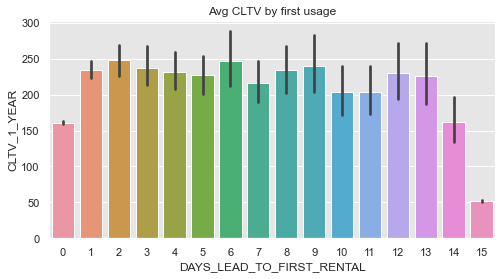

In [367]:
#relation between cltv and initial rental
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='DAYS_LEAD_TO_FIRST_RENTAL', y='CLTV_1_YEAR')
plt.title('Avg CLTV by first usage')
plt.show()

From the above we can see a clear distinction between first two weeks usage and there after a declining CLTV.
This could be a new feature for first two weeks usage vs none first week user. 

In [368]:
df['FIRST_x_WEEKS_USAGE'] = np.where(df['DAYS_LEAD_TO_FIRST_RENTAL'] > 14, 'late_user', 'early_user')

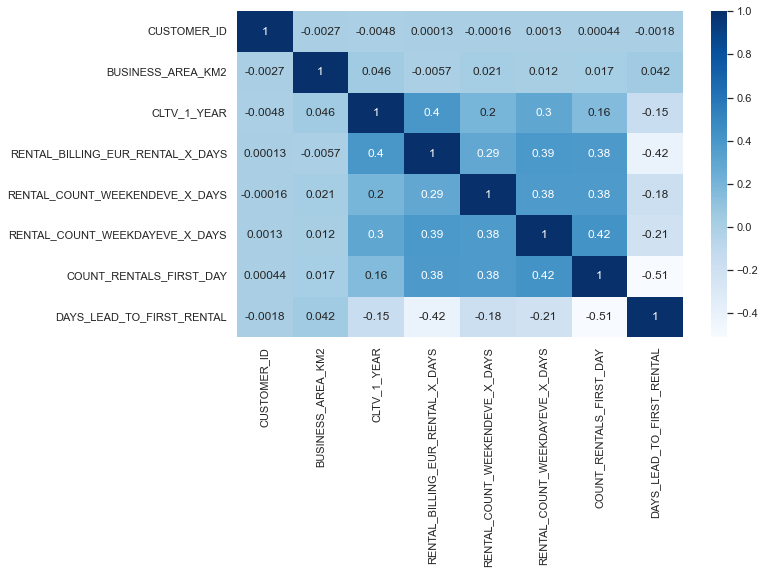

In [369]:
#let's see how these variable are correlated, will give insights on features that may help predict CLTV
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [370]:
#View of channel performance marketing attribution
df .groupby(['CHANNEL']).aggregate({'CUSTOMER_ID':'nunique',
                                   'CLTV_1_YEAR': 'median'}).reset_index().sort_values(by='CUSTOMER_ID', ascending=False)

,CHANNEL,CUSTOMER_ID,CLTV_1_YEAR
4,Organic,121260,43.360
0,Apple Search Ads,14223,38.590
8,Vehicle,13910,37.680
5,Referral,9252,33.230
2,Google,8570,29.960
1,Facebook,3046,22.880
3,Google Video,100,52.120
6,Snapchat,43,103.150
7,TikTok,12,32.980


Snapchat, Google Video & Organic channel seeming to be the highest grossing respectively. However, spending on ogranic may not be a function of marketing and the other two have small amounts of numbers. 

In [371]:
#CLVT by operating system
df.groupby(['OS']).aggregate({'CUSTOMER_ID':'nunique',
                                   'CLTV_1_YEAR': 'median'}).reset_index().sort_values(by='CUSTOMER_ID', ascending=False)

,OS,CUSTOMER_ID,CLTV_1_YEAR
0,Android,112678,42.950
1,iOS,57738,37.320


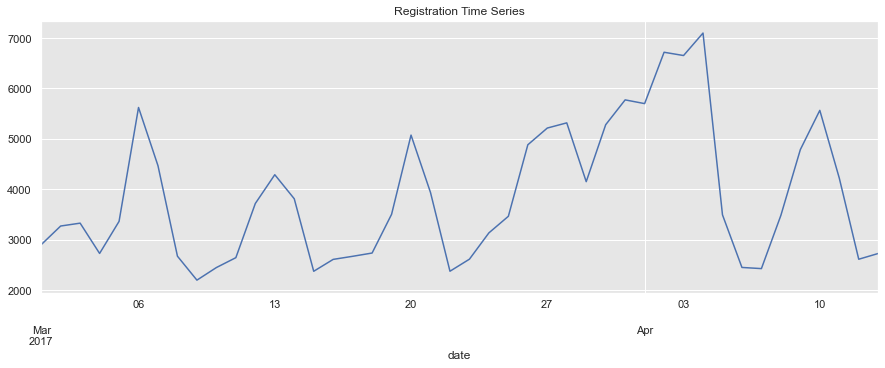

In [372]:
# View of regsitration over time series may provide insighst of how it influences CLTV
plt.figure(figsize = (15, 5))
df.groupby(['date'])['CUSTOMER_ID'].nunique().plot()
plt.title("Registration Time Series")
plt.show()

In [373]:
#aggregate registration by day instead of time to view patterns
df_reg = df.groupby(['REGISTERED_AT'])['CUSTOMER_ID'].nunique()
df_reg = df_reg.resample('D').sum()

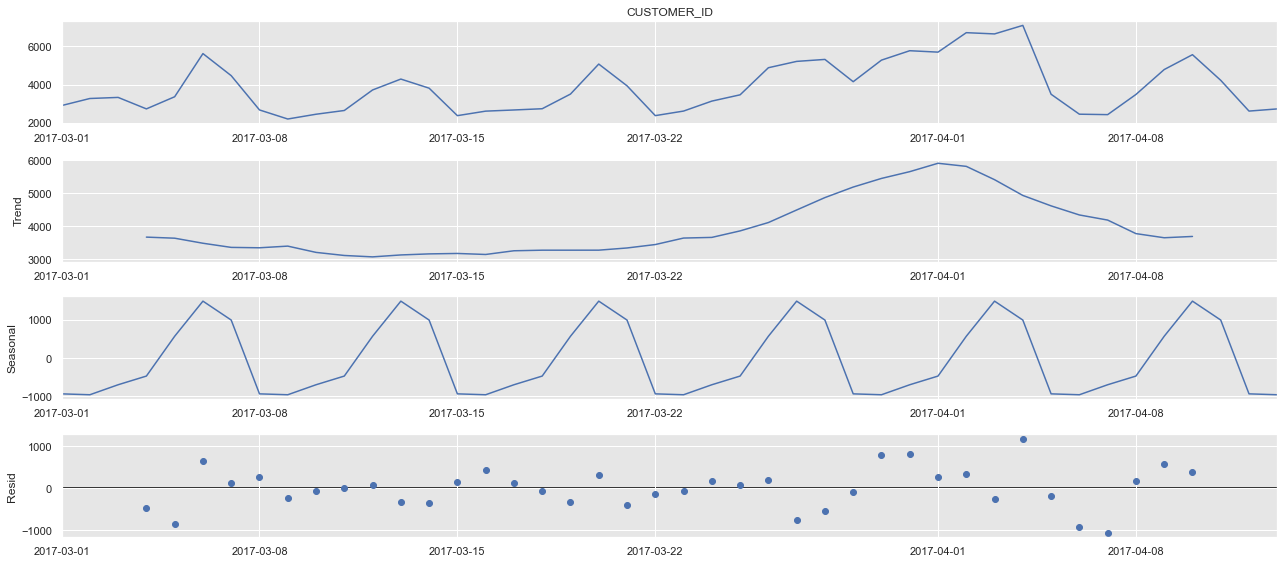

In [374]:
#decompose time series to view trends of sign ups
from pylab import rcParams 
rcParams['figure.figsize'] = 18,8
from statsmodels.tsa.seasonal import seasonal_decompose
# visualize seasonality
result = seasonal_decompose(df_reg, model='additive')
result.plot()
plt.show()

Definitely trend and/or seasonality in registration e.g. registraitions seem to peak on Mondays and then constant at month end of March. May be indicative of demand for users who need to use services for work purposes. My hypothesis is that we could estimate day of week of registration and assum most of these Monday registers end up mostly using services within two weeks as oppose to those that do not. 

In [375]:
#create new feature for day of week - check to see if registration on certain days affect CLTV
df['day_of_week'] = df['REGISTERED_AT'].dt.day_name()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['day_of_week'] = df['day_of_week'].astype(cat_type)

In [376]:
#check above hypothesis
df.groupby(['day_of_week']).agg({'CUSTOMER_ID':'nunique',
                                'RENTAL_BILLING_EUR_RENTAL_X_DAYS': 'median', 
                                'CLTV_1_YEAR': 'mean',
                                'COUNT_RENTALS_FIRST_DAY':'mean',
                                'RENTAL_COUNT_WEEKENDEVE_X_DAYS':'mean',
                                 'RENTAL_COUNT_WEEKDAYEVE_X_DAYS':'mean',
                                'DAYS_LEAD_TO_FIRST_RENTAL':'mean'})

,CUSTOMER_ID,RENTAL_BILLING_EUR_RENTAL_X_DAYS,CLTV_1_YEAR,COUNT_RENTALS_FIRST_DAY,RENTAL_COUNT_WEEKENDEVE_X_DAYS,RENTAL_COUNT_WEEKDAYEVE_X_DAYS,DAYS_LEAD_TO_FIRST_RENTAL
day_of_week,,,,,,,
Monday,32410,12.180,124.259,1.123,0.516,0.211,4.477
Tuesday,28844,11.080,122.490,0.986,0.414,0.248,5.049
Wednesday,20562,9.350,140.184,0.951,0.103,0.713,5.656
Thursday,21132,9.780,145.456,1.006,0.105,0.737,5.335
Friday,19768,10.910,143.833,1.048,0.106,0.741,4.895
Saturday,20739,10.410,138.743,1.051,0.125,0.686,4.953
Sunday,26961,11.580,134.334,1.102,0.155,0.661,4.559


As predicted the Sunday - Monday users are a larger portion of registers and on average their count of first day usage is greater than others. May indicate that these are users who use services to travel to and from work.

In [377]:
#new feature for users that ride both weekdays & weekends
df['RENTAL_COUNTS_TOTAL'] = df['RENTAL_COUNT_WEEKENDEVE_X_DAYS'] + df['RENTAL_COUNT_WEEKDAYEVE_X_DAYS']

In [378]:
#group BUSINESS_AREA_KM2 to see how this impact CLTV
df.BUSINESS_AREA_KM2.fillna(0, inplace=True)
df['BUSINESS_SIZE'] = pd.cut(df.BUSINESS_AREA_KM2, bins=3,
                      labels=[1, 2, 3])
df['BUSINESS_SIZE'] = df['BUSINESS_SIZE'].astype(int)

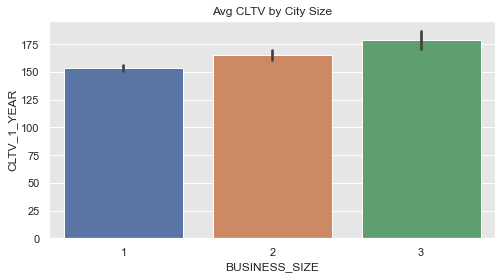

In [379]:
#relation between cltv and initial rental
plt.figure(figsize=(8,4))
sns.barplot(data=df[df['BUSINESS_AREA_KM2'] > 0] , x='BUSINESS_SIZE', y='CLTV_1_YEAR', )
plt.title('Avg CLTV by City Size')
plt.show()

In [380]:
#which countries spend more on average with TIER
df.pivot_table(index='FIRST_RENTAL_COUNTRY', columns='BUSINESS_SIZE', values='CLTV_1_YEAR', aggfunc=['median', 'count'])

median                   count                   
BUSINESS_SIZE              1      2      3         1         2        3
FIRST_RENTAL_COUNTRY                                                   
Austria               77.000 91.800    NaN  1983.000  2075.000      NaN
Croatia                  NaN 59.020    NaN       NaN  7733.000      NaN
Denmark               48.810    NaN    NaN   400.000       NaN      NaN
Finland              114.455    NaN    NaN  1634.000       NaN      NaN
France                58.840    NaN    NaN 11319.000       NaN      NaN
Germany               61.060 59.560 53.710 41455.000 11959.000 2776.000
Norway               107.640    NaN    NaN  3249.000       NaN      NaN
Portugal              59.725    NaN    NaN  2028.000       NaN      NaN
Qatar                 46.990    NaN    NaN  2097.000       NaN      NaN
Spain                 81.605    NaN 72.190  1362.000       NaN 6020.000
Sweden                95.200    NaN    NaN  5944.000       NaN      NaN
Switzerland           82.170 72.960    NaN  2617.000   988.000      NaN
UAE                   44.310    NaN    NaN 10539.000       NaN      NaN
United Kingdom        43.990    NaN    NaN  2318.000       NaN      NaN
no rental              0.000    NaN    NaN 51920.000       NaN      NaN

<AxesSubplot:xlabel='FIRST_RENTAL_COUNTRY', ylabel='CLTV_1_YEAR'>

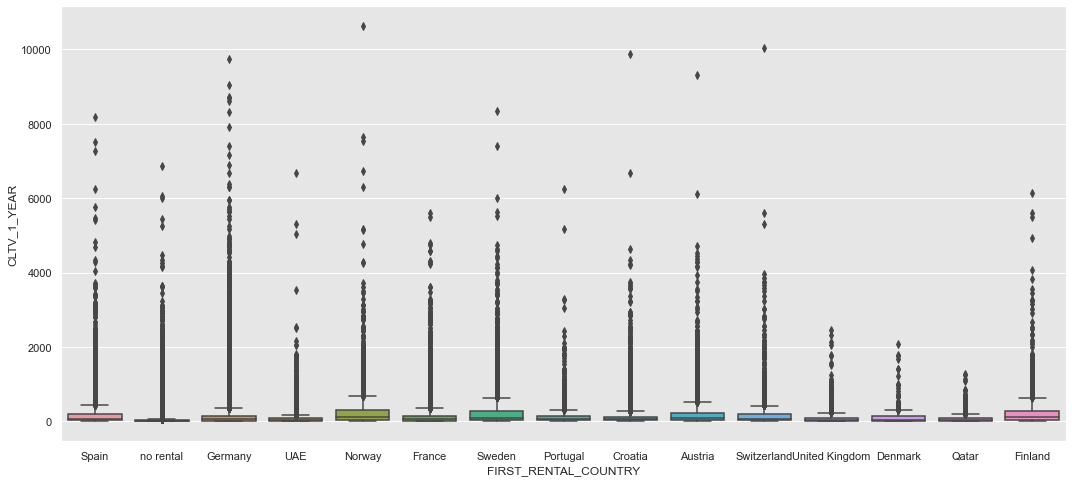

In [381]:
sns.boxplot(x = df['FIRST_RENTAL_COUNTRY'],
           y = df['CLTV_1_YEAR'])

In [382]:
#please explain how no rentals within first 2 weeks has usage in first 2 weeks with no revenue?
df[(df['BUSINESS_AREA_KM2'] == 0) & (df['RENTAL_BILLING_EUR_RENTAL_X_DAYS'] == 0) & (df['DAYS_LEAD_TO_FIRST_RENTAL'] <15)]

,CUSTOMER_ID,FIRST_RENTAL_ZONE_ID,FIRST_RENTAL_COUNTRY,REGISTERED_AT,BUSINESS_AREA_KM2,CLTV_1_YEAR,RENTAL_BILLING_EUR_RENTAL_X_DAYS,RENTAL_COUNT_WEEKENDEVE_X_DAYS,RENTAL_COUNT_WEEKDAYEVE_X_DAYS,COUNT_RENTALS_FIRST_DAY,DAYS_LEAD_TO_FIRST_RENTAL,CHANNEL,OS,date,FIRST_x_WEEKS_USAGE,day_of_week,RENTAL_COUNTS_TOTAL,BUSINESS_SIZE
127,85346852,NECKARSULM,Germany,2017-03-01 06:21:22.013234393+00:00,0.000,109.410,0.000,0,0,1,0,Referral,Android,2017-03-01,early_user,Wednesday,0,1
340,69157684,MUELHEIM-RUHR,Germany,2017-03-01 08:55:10.244091028+00:00,0.000,0.000,0.000,0,0,0,2,Referral,Android,2017-03-01,early_user,Wednesday,0,1
434,90689870,MUELHEIM-RUHR,Germany,2017-03-01 09:38:45.293924332+00:00,0.000,0.000,0.000,0,0,0,1,Organic,Android,2017-03-01,early_user,Wednesday,0,1
533,84009113,NECKARSULM,Germany,2017-03-01 10:23:48.962595164+00:00,0.000,0.000,0.000,0,1,0,2,Organic,iOS,2017-03-01,early_user,Wednesday,1,1
556,64231435,CHEMNITZ,Germany,2017-03-01 10:33:13.341264677+00:00,0.000,0.000,0.000,0,0,1,0,Referral,Android,2017-03-01,early_user,Wednesday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170068,57978747,LUDWIGSBURG,Germany,2017-04-13 19:33:31.511435930+00:00,0.000,0.000,0.000,0,1,0,9,Referral,Android,2017-04-13,early_user,Thursday,1,1
170103,16850589,LUDWIGSBURG,Germany,2017-04-13 19:51:04.920384931+00:00,0.000,177.110,0.000,0,2,0,8,Referral,Android,2017-04-13,early_user,Thursday,2,1
170178,23319417,LUDWIGSBURG,Germany,2017-04-13 20:30:44.857265614+00:00,0.000,0.000,0.000,0,1,2,1,Organic,iOS,2017-04-13,early_user,Thursday,1,1
170305,17518496,BERGEN,Norway,2017-04-13 21:46:30.613218341+00:00,0.000,210.250,0.000,0,0,5,0,Organic,Android,2017-04-13,early_user,Thursday,0,1


In [383]:
# dummy categorical features for ML purpose
df = pd.get_dummies(df)

**Analysis**

From the above analysis, I have concluded the following:

1. The variance between high to low CLTV is not easily identifiable by the any single feature in particular
2. With the above mentioned, it may be more useful to use a combination of the all the features 
3. Additionally, I assume that CLTV for marketing purpose will not need to be an exact value, but rather a range for each user

The above assumption suggestive that an easy approach to understand how may groups is best needed to identify users with similarities, and these similarities can then lead us to which CLTV range they fit in. 

Alas, the appraoch will be the following:

1. Use K-means clustering to find similar behaviours amongst users
2. Group these users and determine whether CLTV is then easier to identify by these clusters
3. If point 2 hypothesis holds true, then use the clusters as a feature
4. Create ranges for CLTV and use a classification approach to predict the groups

In [384]:
#In order to use K-means I will scale continious features for outliers. 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = df.copy()

col_names = ['BUSINESS_AREA_KM2', 'CLTV_1_YEAR', 'RENTAL_BILLING_EUR_RENTAL_X_DAYS', 'RENTAL_COUNT_WEEKENDEVE_X_DAYS',
             'RENTAL_COUNT_WEEKDAYEVE_X_DAYS', 'COUNT_RENTALS_FIRST_DAY', 'DAYS_LEAD_TO_FIRST_RENTAL','RENTAL_COUNTS_TOTAL',
 'BUSINESS_SIZE']

scaled_features[col_names] = scaler.fit_transform(scaled_features[col_names])
features = scaled_features[col_names]

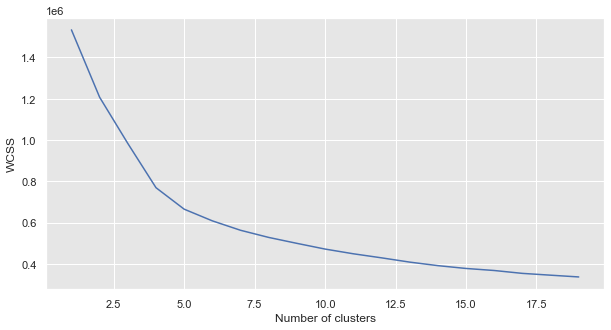

In [385]:
#Build elbow method to view optimal amount of clusters
from sklearn.cluster import KMeans

wcss = [] 
for i in range(1, 20): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(features) 
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 20), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [386]:
#Using kmeans algo to create 3 clusters
kmeans = KMeans(n_clusters = 3, init = "k-means++")
y_kmeans = kmeans.fit_predict(features)

In [387]:
# Add PCA to visualize clusters spatially
from sklearn.decomposition import PCA
pca_recharge = PCA(n_components=2)
principalComponents_recharge = pca_recharge.fit_transform(features)

In [388]:
principal_recharge_Df = pd.DataFrame(data = principalComponents_recharge
             , columns = ['principal_component_1', 'principal_component_2'])

In [389]:
print('Explained variation per principal component: {}'.format(pca_recharge.explained_variance_ratio_))

Explained variation per principal component: [0.38935254 0.21805561]


In [390]:
#create dataframe for features for principle components
data_final = pd.concat([principal_recharge_Df, df['CLTV_1_YEAR'].reset_index()], axis=1, ignore_index=True)
data_final.rename(columns={0: 'principal_component_1',
                          1: 'principal_component_2',
                          3:'CLTV_1_YEAR'}, inplace=True)
data_final.drop([2], axis=1, inplace=True)
data_final['cluster'] = y_kmeans

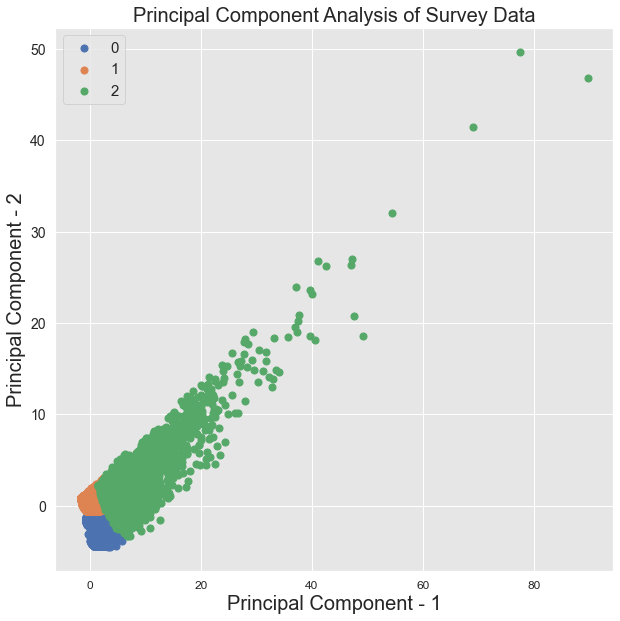

In [391]:
# visualize PCA
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Survey Data",fontsize=20)
targets = range(len(data_final['cluster'].unique()))
for target in targets:
    indicesToKeep = data_final['cluster'] == target
    plt.scatter(data_final.loc[indicesToKeep, 'principal_component_1']
               , data_final.loc[indicesToKeep, 'principal_component_2'], s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

In [392]:
#Add created features to origianl dataframe
df = pd.merge(df, data_final[['cluster', 'principal_component_1', 'principal_component_2']], left_index=True, right_index=True)
df.groupby('cluster').agg({'CLTV_1_YEAR':'describe'})

CLTV_1_YEAR                                                          
              count    mean      std   min     25%     50%      75%       max
cluster                                                                      
0         30285.000 138.615  241.876 0.000  26.110  58.930  141.780  3621.790
1        133457.000  97.930  205.644 0.000   0.000  33.010   98.250  3649.480
2          6674.000 837.830 1048.468 0.000 199.862 441.720 1072.237 10622.330

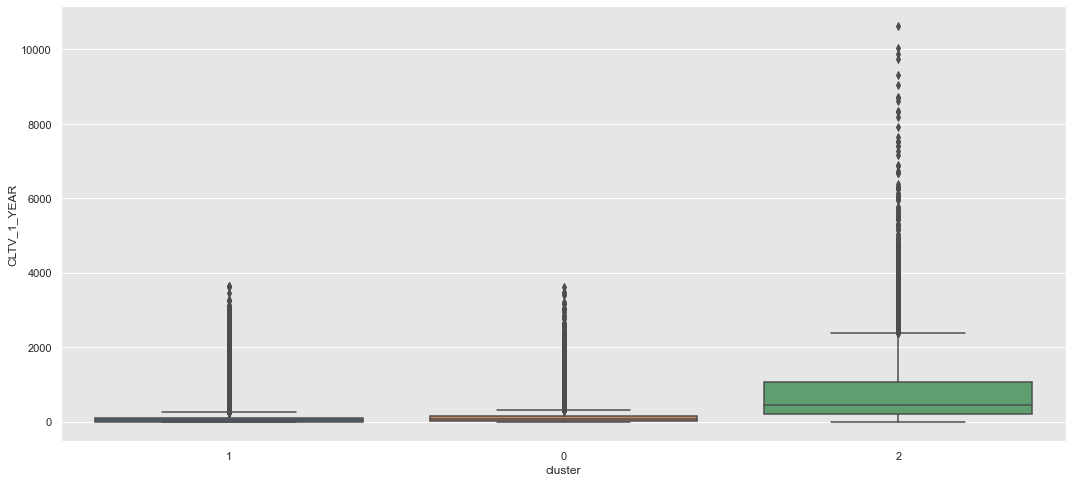

In [394]:
#view how well clusters can difference CLTV
sns.boxplot(data=df, x='cluster', y='CLTV_1_YEAR', order=[1,0,2])
plt.show()

In [395]:
#edit clusters to make it ordinal feature
df.cluster.replace({1:0,
                   0:1}, inplace=True)

In [415]:
#some guidence for creating the groups
df['CLTV_1_YEAR'].describe()

count   170416.000
mean       134.137
std        327.082
min          0.000
25%          8.850
50%         40.770
75%        120.400
max      10622.330
Name: CLTV_1_YEAR, dtype: float64

In [396]:
#as stated earlier the cluster appears to be a good feature to add, LV = Low Value, MV = Mid Value etc... 
bins = [0.0, 75, 250, np.inf] 
names = ['LV', 'MV', 'HV'] 

df['target'] = pd.cut(df['CLTV_1_YEAR'], bins, labels=names)
df['target'] = df['target'].astype(str)
df.groupby(['target'])['CLTV_1_YEAR'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
HV,21632.000,699.356,672.926,250.020,329.188,469.300,789.663,10622.330
LV,73721.000,33.331,19.316,0.680,16.800,30.650,47.850,75.000
MV,38320.000,137.613,47.716,75.050,96.930,126.890,171.610,249.970
nan,36743.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [398]:
#for those without spend - NV = No Value
df.target.replace({'nan':'NV'}, inplace=True)

In [399]:
#feature selection - correltion to identify most correlated features for CLTV - top 10
corr = df.corr()
X_Feats = abs(corr['CLTV_1_YEAR']).sort_values(ascending=False)[1:11].index.tolist()

In [400]:
#create train, validation & test split
df = df.sample(frac=1)
threshold = round(df.shape[0]*.8)
df_train = df.iloc[:threshold]
df_test = df.iloc[threshold:]

In [401]:
#load ML models, split librries, target, etc...
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier

X = df_train[X_Feats]
y = df_train['target']

In [402]:
#SMOTE for imbalanced classes

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.2, random_state=42)

In [403]:
#build model & evaluation 
from sklearn.metrics import f1_score

model = XGBClassifier(metric = 'multi:softprob', random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import classification_report

y_pred = (model.predict(X_test))

print(classification_report(y_test, y_pred))
print()

[11:12:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:12:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

          HV       0.71      0.74      0.73     11756
          LV       0.66      0.81      0.73     11893
          MV       0.67      0.48      0.56     11907
          NV       0.96      0.99      0.98     11760

    accuracy                           0.75     47316
   macro avg       0.75      0.76      0.75     47316
weighted a

Not the greatest, but also not bad results, we can predict NV and HV  quite well. Now lets see how it performace on new data.

In [408]:
#for test dataset 
y_pred_test = model.predict(df_test[X.columns.tolist()])
print(classification_report(df_test['target'], y_pred_test))

              precision    recall  f1-score   support

          HV       0.50      0.71      0.58      4319
          LV       0.79      0.80      0.80     14576
          MV       0.62      0.44      0.52      7766
          NV       0.95      0.99      0.97      7422

    accuracy                           0.75     34083
   macro avg       0.72      0.74      0.72     34083
weighted avg       0.75      0.75      0.74     34083



Bit overfit on HV, but still maintains high recall but low precision.

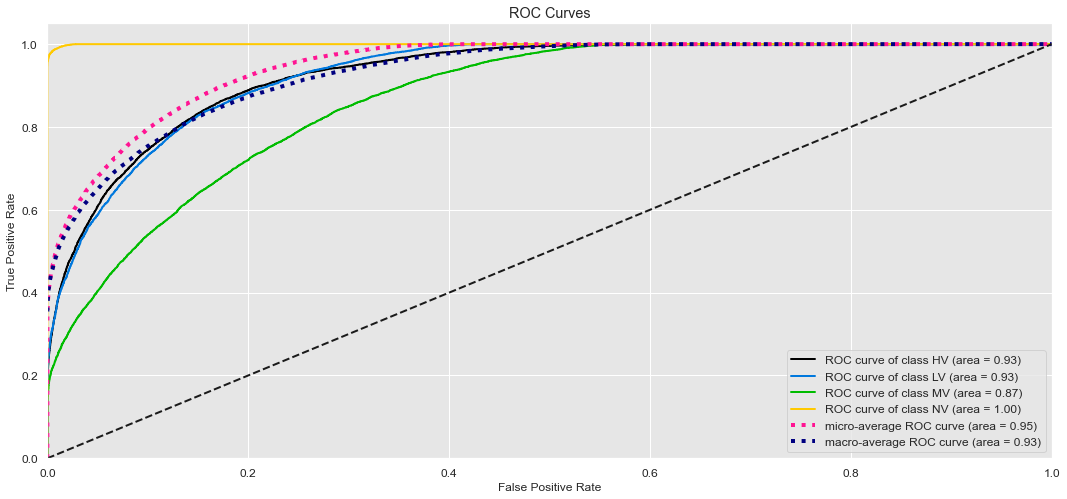

In [409]:
#view AUC for each class
import scikitplot as skplt

predict_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, predict_probas)
plt.show()

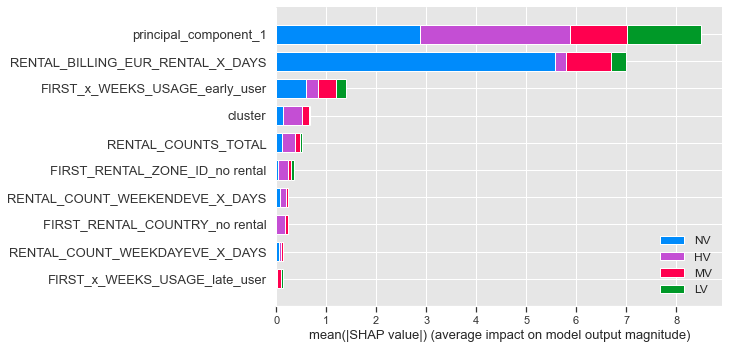

In [410]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

class_names = ['HV', 'MV', 'LV', 'NV']

shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns)

Above we see that , PC1 is the most important feature, especially for NV and HV classes, along with Rental Billing for NV.

In [411]:
# Lets dig deeper and understand how these feature better identify the CLTV groups
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_expl = df_test[X.columns.tolist()]
df_expl.iloc[:,1:] = scaler.fit_transform(df_expl.iloc[:,1:])
df_expl = pd.concat([df_expl, df_test['target']], axis=1)
df_expl = df_expl.groupby(['target']).mean().reset_index()

In [412]:
#Function to create radar map for features & target
def make_spider(df,  row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=11)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1], ["1"], color="grey", size=2)
    plt.ylim(0,1)

    # Ind1
    values=df.loc[row].drop('target').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=20, color=color, y=1.1)

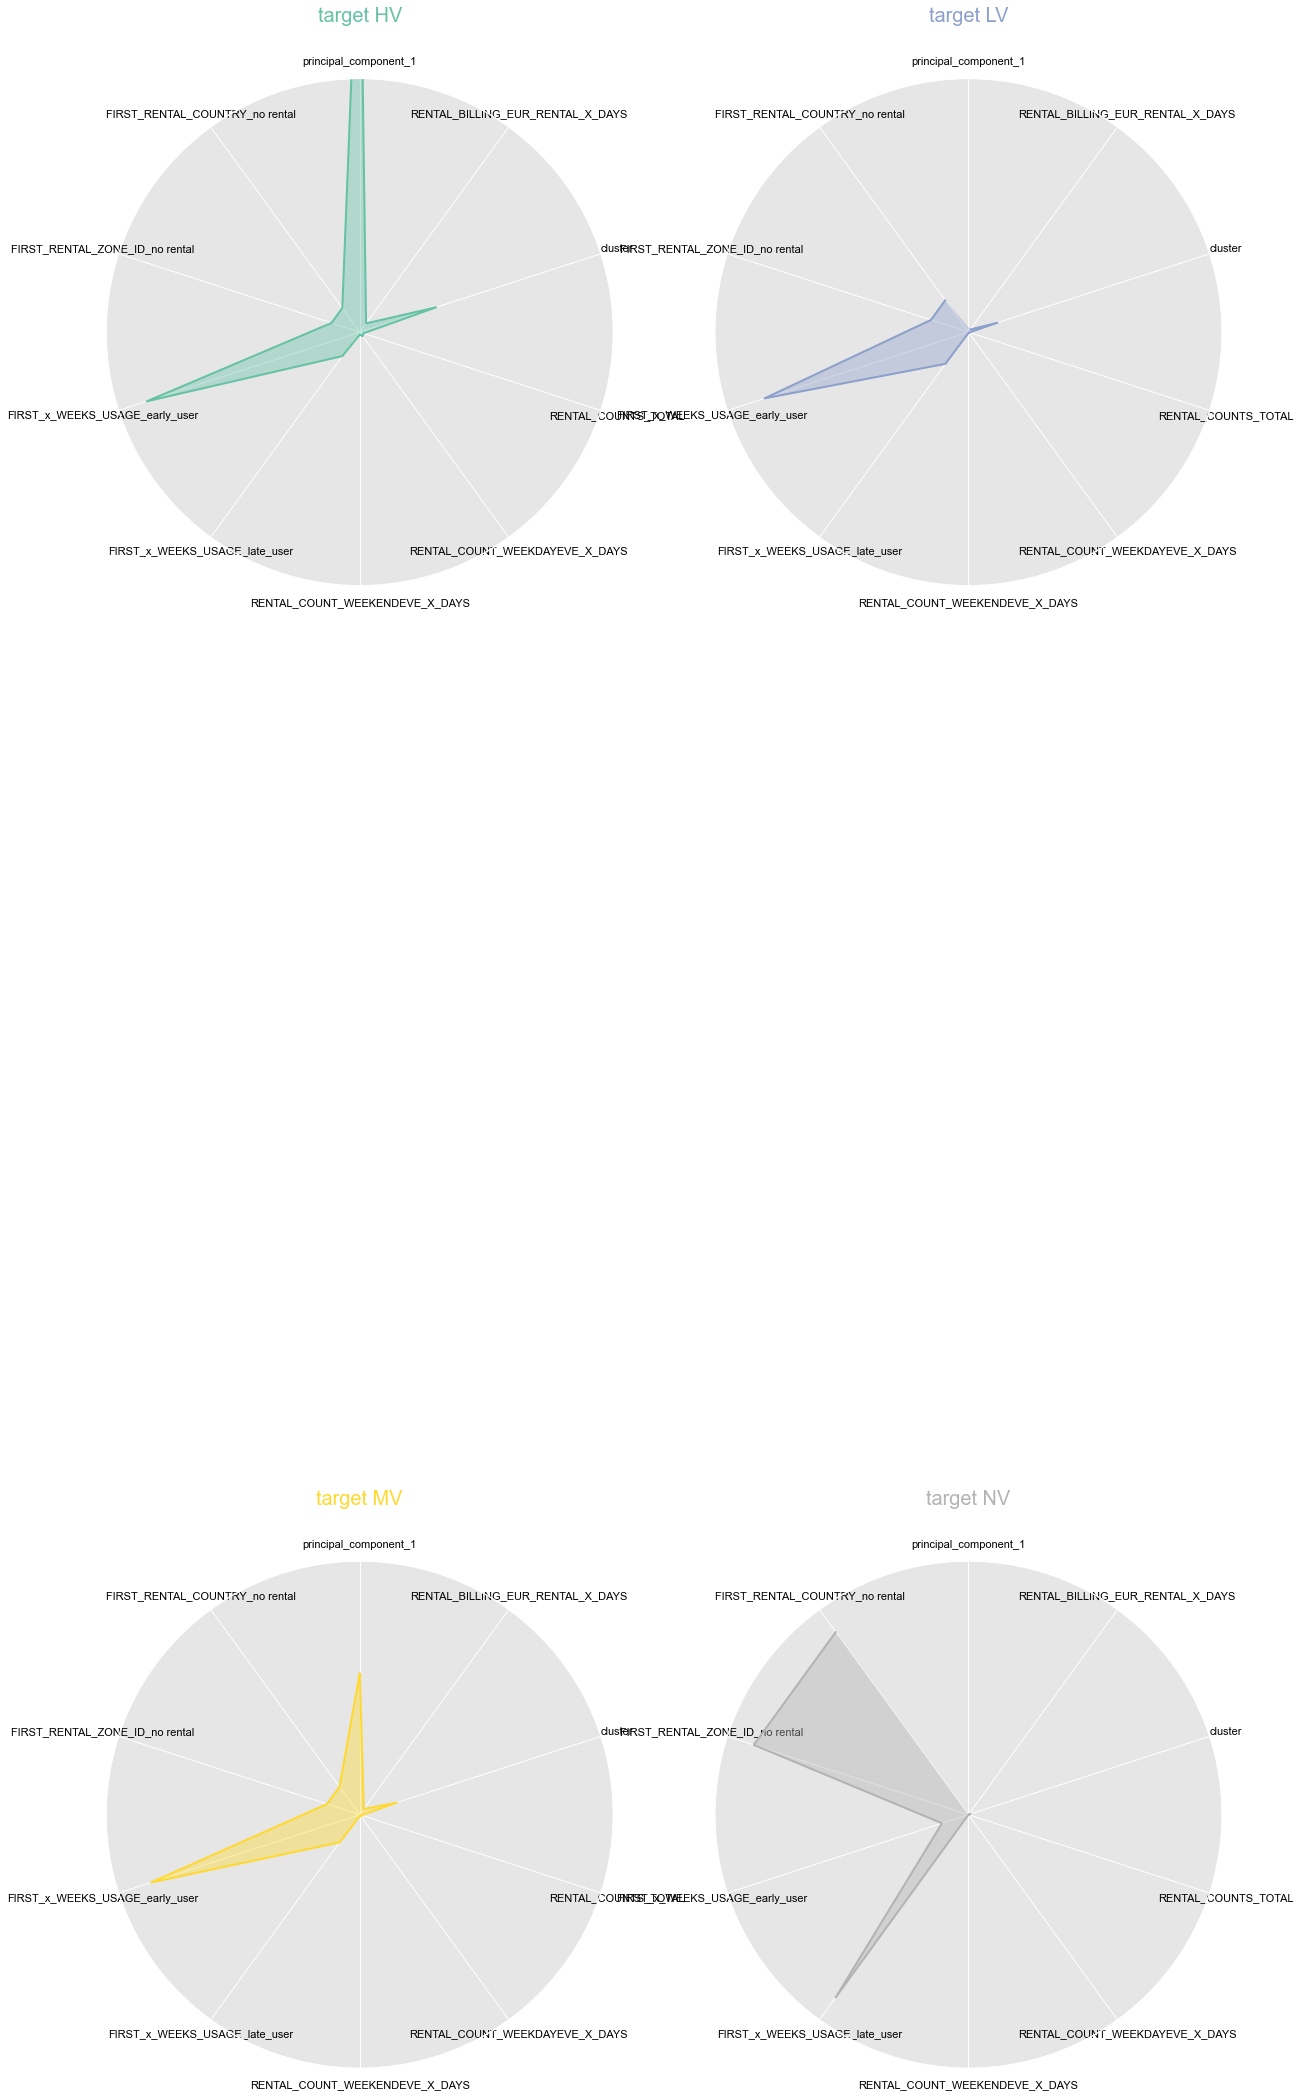

In [344]:
# initialize the figure
# my_dpi=150
plt.figure(figsize=(20, 50) )
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_expl.index))
 
# Loop to plot
for row in range(0, len(df_expl.index)):
    make_spider( row=row, title='target '+df_expl['target'][row], color=my_palette(row))

The above visual suggests the following:

**HV** 
<br> - Higher principal component 1 comapared to other value bands
<br> - Higher first 2 weeks usage comapared to other value bands
<br> - Higher cluster value comapared to other value bands
<br> - lower values of non rentals in first two weeks

**MV** 
<br> - Similar to HV, MV has high principal componanet value
<br> - Lesser values in principle component
<br> - High cluster values but less than HV
<br> - later usage than HV

**LV** 
<br> - Principle component values around 0
<br> - Also early users
<br> - low cluster values but less than HV

**NV** 
<br> - No rentals within first two weeks
<br> - predominantly cluster 0

In [413]:
#Let's view highest grossinf
df_1 = pd.read_csv(r'cltv_estimations.csv')
df_1 = df_1.merge(df[['target', 'CUSTOMER_ID']], on='CUSTOMER_ID', how='left')

df_1.pivot_table(index='CHANNEL', columns='target', values='CLTV_1_YEAR', aggfunc=['median', 'count'])

median                          count                      \
target                HV     LV      MV    NV        HV        LV        MV   
CHANNEL                                                                       
Apple Search Ads 478.740 31.780 128.160 0.000  1778.000  5702.000  3117.000   
Facebook         462.150 28.105 130.800 0.000   344.000  1034.000   555.000   
Google           470.685 30.190 126.580 0.000  1024.000  3301.000  1599.000   
Google Video     488.460 30.035 122.555 0.000    17.000    34.000    24.000   
Organic          473.545 31.510 127.070 0.000 16096.000 51851.000 28048.000   
Referral         459.515 22.650 127.075 0.000  1160.000  4337.000  1952.000   
Snapchat         408.710 28.150 110.050 0.000    12.000     9.000    15.000   
TikTok               NaN 26.920 137.200 0.000       NaN     9.000     2.000   
Vehicle          430.940 29.060 123.265 0.000  1201.000  7444.000  3008.000   

                            
target                  NV  
CHANNEL                     
Apple Search Ads  3626.000  
Facebook          1113.000  
Google            2646.000  
Google Video        25.000  
Organic          25265.000  
Referral          1803.000  
Snapchat             7.000  
TikTok               1.000  
Vehicle           2257.000

**Recommendation**

- Marketing to focus their resources google videos, Apple Search ads & Google
- Once registered, customers with relatively higher values in "cluster", first two weeks of usage, etc... should be prioritized, with promotional offers
- Those without usage in first two weeks should not be added to marketing costs
- Use average/predicted CLTV as guide for Cost of acquisition + retention for margin/profit estimates.
- CLTV prediction can also also be used as an estimate when costing for retargeting of customers, such trying to uplift LV customers to MV or HV.